In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as osp
from data_to_csv import *
import utils
import logging

2019-05-07 14:47:47,402 - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [3]:
sns.set()

conf = {
    'font.size': 14.0,
    'axes.grid': True,
    'axes.axisbelow': True,
    'axes.edgecolor': 'black',
    'axes.facecolor': '#E5E5EF',
#    'axes.facecolor': '#E0E0EF',
    'axes.labelcolor': 'black',
    'axes.titlesize': 15.6,
    'axes.labelsize': 'large',    
    'figure.figsize': (12, 7),
    'figure.titlesize': 'x-large',
    'grid.linewidth': 1.3,
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'legend.fontsize': 'large',
}

plt.rcParams.update(conf)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [5]:
df_posts_2017_10_old = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-10.json')
#df_posts_2017_10_new = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku\posts\2017-10.json')


In [6]:
#df_posts_2017_11 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-11.json')
#df_posts_2017_10 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-10.json')
#df_posts_2017_9 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-9.json')
#df_posts_2017_8 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-8.json')
#df_posts_2017_7 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-7.json')
#df_posts_2017_6 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-6.json')
#df_posts_2017_5 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-5.json')
#df_posts_2017_4 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-4.json')
#df_posts_2017_3 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-3.json')
#df_posts_2017_2 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-2.json')
#df_posts_2017_1 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2017-1.json')
#df_posts_2016_12 = json_posts_to_pandas(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old\posts\2016-12.json')


In [7]:
#df_posts = pd.concat((df_posts_2017_11, df_posts_2017_10, df_posts_2017_9, df_posts_2017_8, df_posts_2017_7, df_posts_2017_6, df_posts_2017_5, df_posts_2017_4, 
#                      df_posts_2017_3, df_posts_2017_2, df_posts_2017_1, df_posts_2016_12))

In [8]:
directory = osp.join(r'E:\Projects\facebook_feeds\texts\scitani_ceskych_a_slovenskych_otaku_old', 'posts')
existing_months = sorted(set([utils.Month.from_str(s.replace('.json', '')) for s in os.listdir(directory)]))
dfs = []
for month in existing_months:
    df = json_posts_to_pandas(osp.join(directory, f'{month}.json'))
    dfs.append(df)


In [9]:
df_posts = pd.concat([i for i in dfs if i.shape[0] > 0][:-1])  # excluding last month, because it is not complete

In [10]:
df_posts = df_posts.set_index('id')
df_posts['created_time'] = pd.to_datetime(df_posts['created_time'])
df_posts['updated_time'] = pd.to_datetime(df_posts['updated_time'])
df_posts['message'] = df_posts['message'].fillna('')

In [11]:
df_posts.head()

,attachment_title,attachment_type,attachment_url,created_time,from_id,from_name,message,object_id,shares_count,status_type,type,updated_time
id,,,,,,,,,,,,
135384786514720_135384799848052,None,None,None,2010-11-26 18:34:49+00:00,1610983968940296,David Svoboda,,None,0,None,status,2010-11-26 18:34:49+00:00
135384786514720_157753440944521,None,None,None,2011-02-28 06:23:52+00:00,1732775143407905,Šárinka Pospíšilová,noo....je tady asi víc holek cooo?! xP :D :D,None,0,None,status,2011-02-28 19:12:53+00:00
135384786514720_157651807621351,None,None,None,2011-02-27 19:08:42+00:00,1565918073474103,Jirka Mičánek,"Tak, název vymyšlen, manga se bude jmenovat ""T...",None,0,None,status,2011-02-28 17:10:56+00:00
135384786514720_157829847603547,Sčítání českých a slovenských otaku,avatar,https://www.facebook.com/groups/135384786514720/,2011-02-28 15:56:12+00:00,1613535518705290,DahviEe Honycut,,None,0,None,status,2011-02-28 15:56:12+00:00
135384786514720_157824030937462,Amv - Do you know your anime?,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-02-28 15:29:50+00:00,1610983968940296,David Svoboda,Už jsme překročili počet 80 členů! Sice to ješ...,None,0,shared_story,link,2011-02-28 15:29:50+00:00


In [12]:
df_posts.describe()

,shares_count
count,46343.000000
mean,0.095937
std,0.925444
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,57.000000


In [13]:
df_posts.shape

(46343, 12)

## some basic things

Text(0, 0.5, 'number of people')

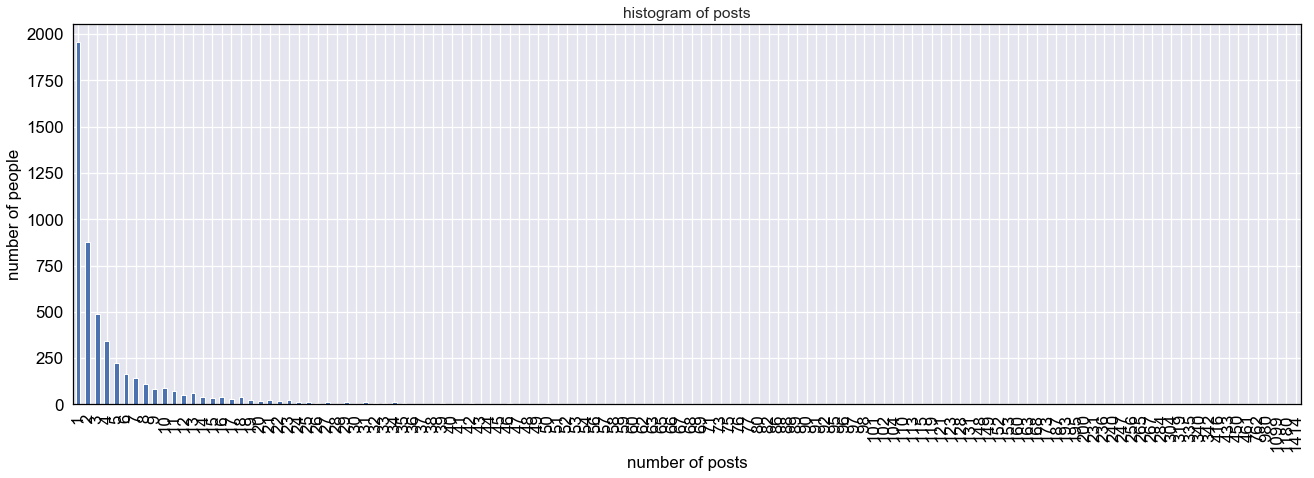

In [14]:
df_posts['from_id'].value_counts().value_counts().sort_index().plot.bar(figsize=(22, 7), title='histogram of posts')
plt.xlabel('number of posts')
plt.ylabel('number of people')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

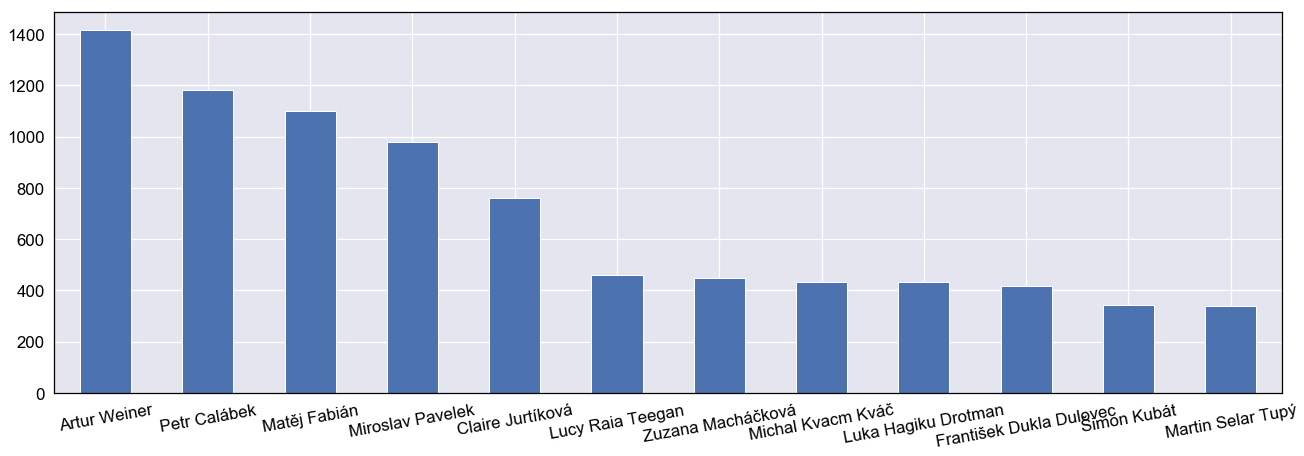

In [15]:
df_posts['from_name'].value_counts()[:12].plot.bar(figsize=(22, 7))
plt.xticks(rotation=10)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

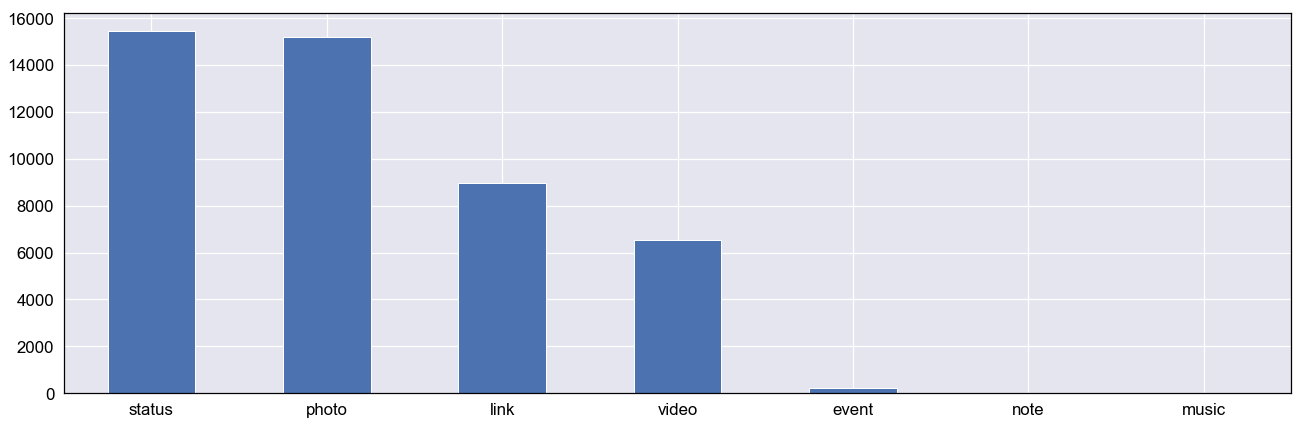

In [16]:
df_posts['type'].value_counts().plot.bar(figsize=(22, 7))
plt.xticks(rotation=0)

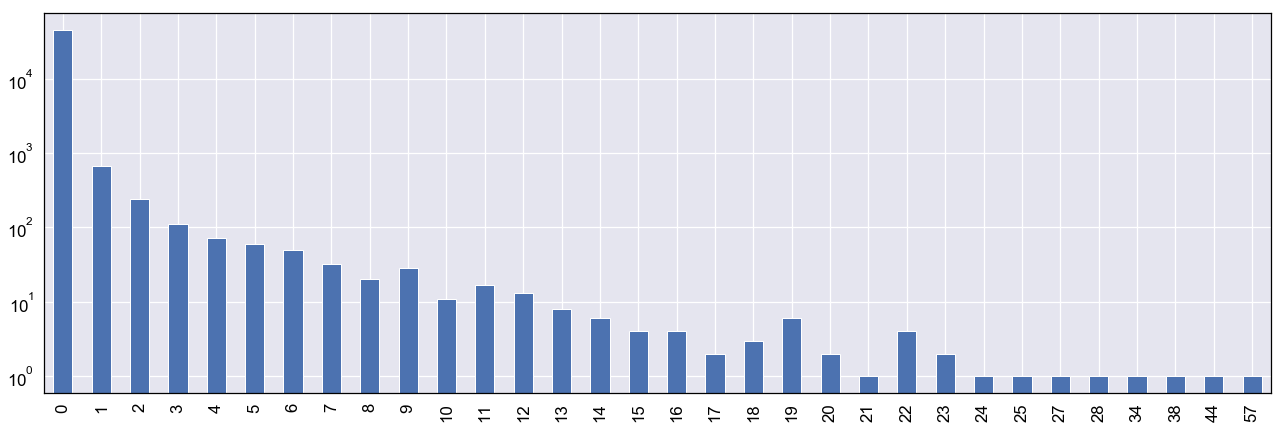

In [17]:
df_posts['shares_count'].value_counts().sort_index().plot.bar(figsize=(22, 7), logy=True)

In [18]:
most_shared = df_posts[df_posts['shares_count'] == df_posts['shares_count'].max()].iloc[0]
most_shared

attachment_title                                                 None
attachment_type                                                 photo
attachment_url      https://www.facebook.com/photo.php?fbid=165331...
created_time                                2017-03-03 17:00:40+00:00
from_id                                              1753959568233505
from_name                                             Tereza Homolová
message                                                              
object_id                                            1653317991630997
shares_count                                                       57
status_type                                              added_photos
type                                                            photo
updated_time                                2017-03-04 23:06:08+00:00
Name: 135384786514720_1265517450168109, dtype: object

In [19]:
most_shared['attachment_url']

'https://www.facebook.com/photo.php?fbid=1653317991630997&set=gm.1265517450168109&type=3'

## message length analysis

In [20]:
df_posts['word_count'] = df_posts['message'].str.split().apply(len)

In [21]:
df_posts['char_count'] = df_posts['message'].str.len()

In [22]:
df_posts['word_count'].value_counts().head(10)

0     7197
1     3831
5     2049
4     2046
3     1969
6     1918
7     1861
2     1845
8     1708
10    1489
Name: word_count, dtype: int64

In [23]:
df_posts['char_count'].value_counts().head(10)

0     7197
2      751
42     593
43     443
27     417
3      385
20     375
26     367
50     364
58     360
Name: char_count, dtype: int64

In [24]:
df_posts[['word_count', 'char_count']].describe()

,word_count,char_count
count,46343.000000,46343.000000
mean,14.225212,87.759165
std,27.712810,161.309000
min,0.000000,0.000000
25%,2.000000,16.000000
50%,8.000000,52.000000
75%,18.000000,109.000000
max,2004.000000,12540.000000


In [25]:
sorted_word_lengths = df_posts['word_count'].sort_values(ascending=False)
sorted_word_lengths.head()

id
135384786514720_1312585192128001    2004
135384786514720_738991762820683     1567
135384786514720_474681122585083     1444
135384786514720_279042012148996     1379
135384786514720_435983839788145     1087
Name: word_count, dtype: int64

In [26]:
sorted_char_lengths = df_posts['char_count'].sort_values(ascending=False)
sorted_char_lengths.head()

id
135384786514720_1312585192128001    12540
135384786514720_474681122585083      8889
135384786514720_435983839788145      7300
135384786514720_738991762820683      5576
135384786514720_995478953838628      4878
Name: char_count, dtype: int64

In [27]:
df_posts.loc[sorted_word_lengths[:10].index][['created_time', 'from_name', 'message', 'word_count', 'char_count']]

,created_time,from_name,message,word_count,char_count
id,,,,,
135384786514720_1312585192128001,2017-04-16 17:37:32+00:00,Matěj Račinský,"Můj první Acon - reportáž\n(je to dlouhé, ale ...",2004,12540
135384786514720_738991762820683,2014-10-18 08:01:37+00:00,Daniela Toušková,". ... ... ... ... ... ... ... ... ,,----~~”'¯¯...",1567,5576
135384786514720_474681122585083,2013-03-01 18:24:37+00:00,Kazuki soejima,contenueing topic from my last post\n\nCharact...,1444,8889
135384786514720_279042012148996,2012-01-12 16:48:09+00:00,Matěj Fabián,"………………….._,,-~’’’¯¯¯’’~-,,\n………………..,-‘’ ; ; ;...",1379,3864
135384786514720_435983839788145,2012-12-05 20:42:02+00:00,Matej Šajgy Horatius,"Schvalne, kto si tu robi zoznam anime, ktoré v...",1087,7300
135384786514720_995478953838628,2016-03-30 18:35:05+00:00,Lukáš Aaron Tesař,Táákže... Colorful ( Movie ) ._.\nhttp://myani...,837,4878
135384786514720_805498252836700,2015-02-26 13:10:44+00:00,Petr Calábek,Trochu literatůry u které jsem si opakoval ana...,720,4491
135384786514720_564412033611991,2013-10-10 16:34:04+00:00,Adam Furik,"Hodně tady vidím různý posty ""Doporučte mi něj...",593,2922
135384786514720_562808753772319,2013-10-06 15:58:35+00:00,Miroslav Obelixovo Lochman,"Ahoj všem,\npředem se omlouvám všem za dlouhý ...",573,3422


In [28]:
df_posts.loc[sorted_char_lengths[:10].index][['created_time', 'from_name', 'message', 'word_count', 'char_count']]

,created_time,from_name,message,word_count,char_count
id,,,,,
135384786514720_1312585192128001,2017-04-16 17:37:32+00:00,Matěj Račinský,"Můj první Acon - reportáž\n(je to dlouhé, ale ...",2004,12540
135384786514720_474681122585083,2013-03-01 18:24:37+00:00,Kazuki soejima,contenueing topic from my last post\n\nCharact...,1444,8889
135384786514720_435983839788145,2012-12-05 20:42:02+00:00,Matej Šajgy Horatius,"Schvalne, kto si tu robi zoznam anime, ktoré v...",1087,7300
135384786514720_738991762820683,2014-10-18 08:01:37+00:00,Daniela Toušková,". ... ... ... ... ... ... ... ... ,,----~~”'¯¯...",1567,5576
135384786514720_995478953838628,2016-03-30 18:35:05+00:00,Lukáš Aaron Tesař,Táákže... Colorful ( Movie ) ._.\nhttp://myani...,837,4878
135384786514720_805498252836700,2015-02-26 13:10:44+00:00,Petr Calábek,Trochu literatůry u které jsem si opakoval ana...,720,4491
135384786514720_279042012148996,2012-01-12 16:48:09+00:00,Matěj Fabián,"………………….._,,-~’’’¯¯¯’’~-,,\n………………..,-‘’ ; ; ;...",1379,3864
135384786514720_843026415750550,2015-05-15 15:38:41+00:00,Gabriela Skopalová,https://www.facebook.com/LetniSkolaJaponstiny?...,1,3737
135384786514720_462173403835855,2013-01-30 20:08:43+00:00,Ayame Coxel Kazebayashi,Jestli chcete spáchat sebevraždu tak čtěte dál...,479,3456


In [29]:
df_posts

,attachment_title,attachment_type,attachment_url,created_time,from_id,from_name,message,object_id,shares_count,status_type,type,updated_time,word_count,char_count
id,,,,,,,,,,,,,,
135384786514720_135384799848052,None,None,None,2010-11-26 18:34:49+00:00,1610983968940296,David Svoboda,,None,0,None,status,2010-11-26 18:34:49+00:00,0,0
135384786514720_157753440944521,None,None,None,2011-02-28 06:23:52+00:00,1732775143407905,Šárinka Pospíšilová,noo....je tady asi víc holek cooo?! xP :D :D,None,0,None,status,2011-02-28 19:12:53+00:00,9,44
135384786514720_157651807621351,None,None,None,2011-02-27 19:08:42+00:00,1565918073474103,Jirka Mičánek,"Tak, název vymyšlen, manga se bude jmenovat ""T...",None,0,None,status,2011-02-28 17:10:56+00:00,84,513
135384786514720_157829847603547,Sčítání českých a slovenských otaku,avatar,https://www.facebook.com/groups/135384786514720/,2011-02-28 15:56:12+00:00,1613535518705290,DahviEe Honycut,,None,0,None,status,2011-02-28 15:56:12+00:00,0,0
135384786514720_157824030937462,Amv - Do you know your anime?,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-02-28 15:29:50+00:00,1610983968940296,David Svoboda,Už jsme překročili počet 80 členů! Sice to ješ...,None,0,shared_story,link,2011-02-28 15:29:50+00:00,64,360
135384786514720_157374407649091,None,None,None,2011-02-26 12:53:22+00:00,1739404629417511,Jan Benny Beneš,Tak schválně............Je tu někdo komu je 15...,None,0,None,status,2011-02-28 06:14:47+00:00,8,51
135384786514720_157550380964827,None,None,None,2011-02-27 08:28:50+00:00,1739404629417511,Jan Benny Beneš,Kdo tady poslouchá metal?,None,0,None,status,2011-02-27 19:23:05+00:00,4,25
135384786514720_157444884308710,None,None,None,2011-02-26 19:33:41+00:00,1565918073474103,Jirka Mičánek,Snad se konečně dám do své vlastní mangy - Asi...,None,0,None,status,2011-02-26 20:38:07+00:00,18,86
135384786514720_157382160981649,None,None,None,2011-02-26 13:42:45+00:00,1715084028523345,Anastasia Kuramžina,"Nechápu lidi, kteří si myslí, že Pokemoni a He...",None,0,None,status,2011-02-26 19:36:52+00:00,13,66


In [30]:
sorted_word_lengths.index[:10]

Index(['135384786514720_1312585192128001', '135384786514720_738991762820683',
       '135384786514720_474681122585083', '135384786514720_279042012148996',
       '135384786514720_435983839788145', '135384786514720_995478953838628',
       '135384786514720_805498252836700', '135384786514720_564412033611991',
       '135384786514720_562808753772319', '135384786514720_1068859766500546'],
      dtype='object', name='id')

In [31]:
df_posts[df_posts['word_count'] == sorted_word_lengths.iloc[0]]

,attachment_title,attachment_type,attachment_url,created_time,from_id,from_name,message,object_id,shares_count,status_type,type,updated_time,word_count,char_count
id,,,,,,,,,,,,,,
135384786514720_1312585192128001,None,None,None,2017-04-16 17:37:32+00:00,10214141895972175,Matěj Račinský,"Můj první Acon - reportáž\n(je to dlouhé, ale ...",None,8,None,status,2017-05-05 20:52:19+00:00,2004,12540


In [32]:
df_posts[df_posts['word_count'] == sorted_word_lengths.iloc[1]]

,attachment_title,attachment_type,attachment_url,created_time,from_id,from_name,message,object_id,shares_count,status_type,type,updated_time,word_count,char_count
id,,,,,,,,,,,,,,
135384786514720_738991762820683,None,None,None,2014-10-18 08:01:37+00:00,1975608905799520,Daniela Toušková,". ... ... ... ... ... ... ... ... ,,----~~”'¯¯...",None,0,None,status,2014-10-18 19:34:22+00:00,1567,5576


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

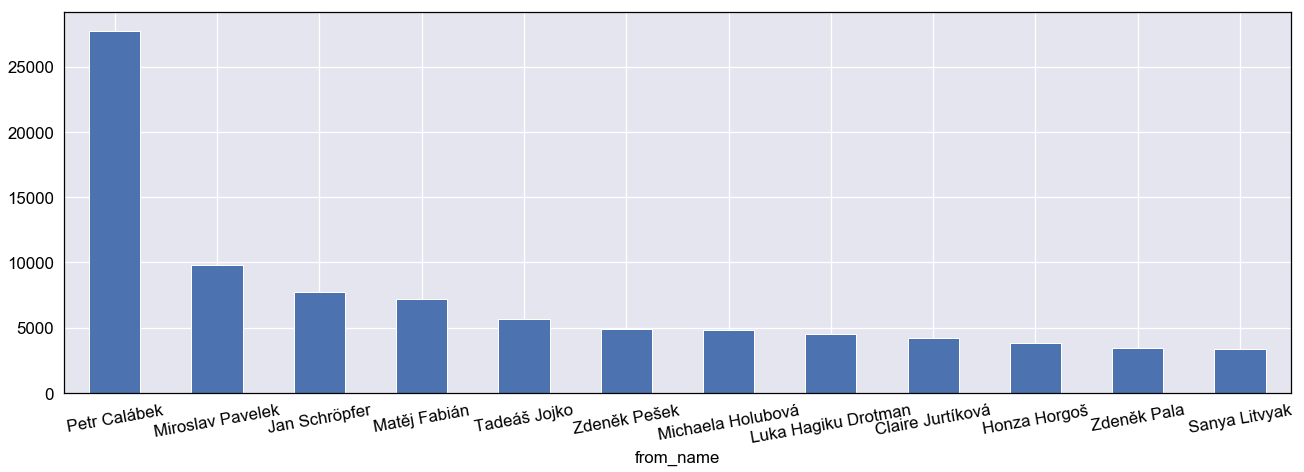

In [33]:
df_posts.groupby('from_name').sum().sort_values(by='word_count', ascending=False)[:12]['word_count'].plot.bar(figsize=(22, 7))
plt.xticks(rotation=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

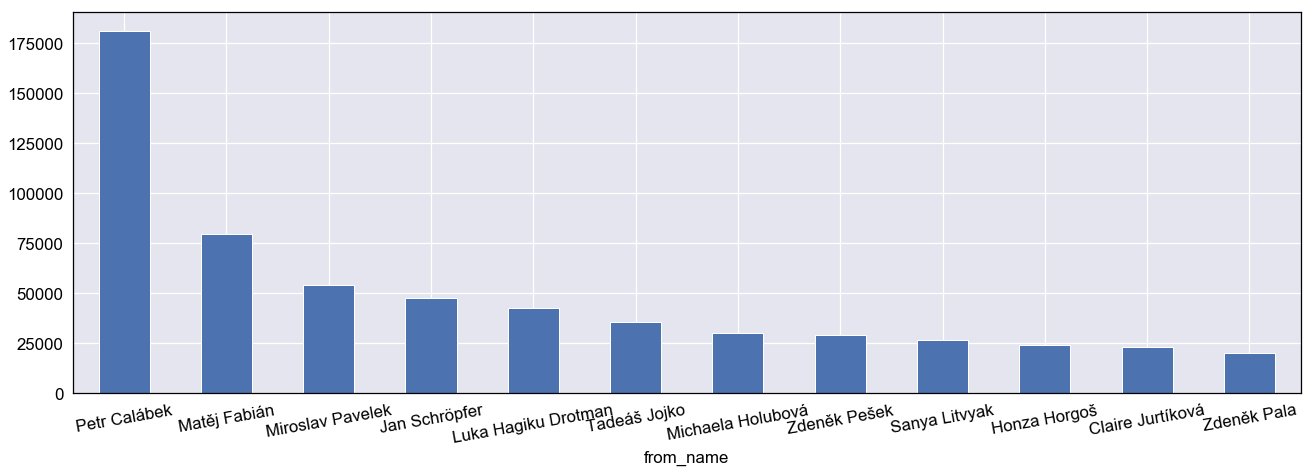

In [34]:
df_posts.groupby('from_name').sum().sort_values(by='char_count', ascending=False)[:12]['char_count'].plot.bar(figsize=(22, 7))
plt.xticks(rotation=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

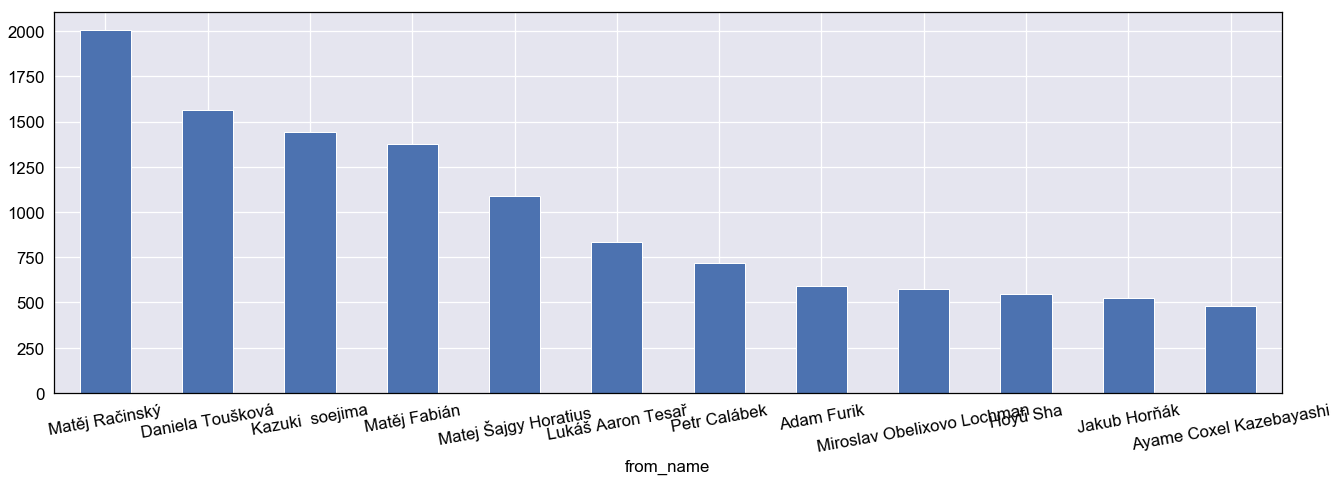

In [35]:
df_posts.groupby('from_name').max().sort_values(by='word_count', ascending=False)[:12]['word_count'].plot.bar(figsize=(22, 7))
plt.xticks(rotation=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

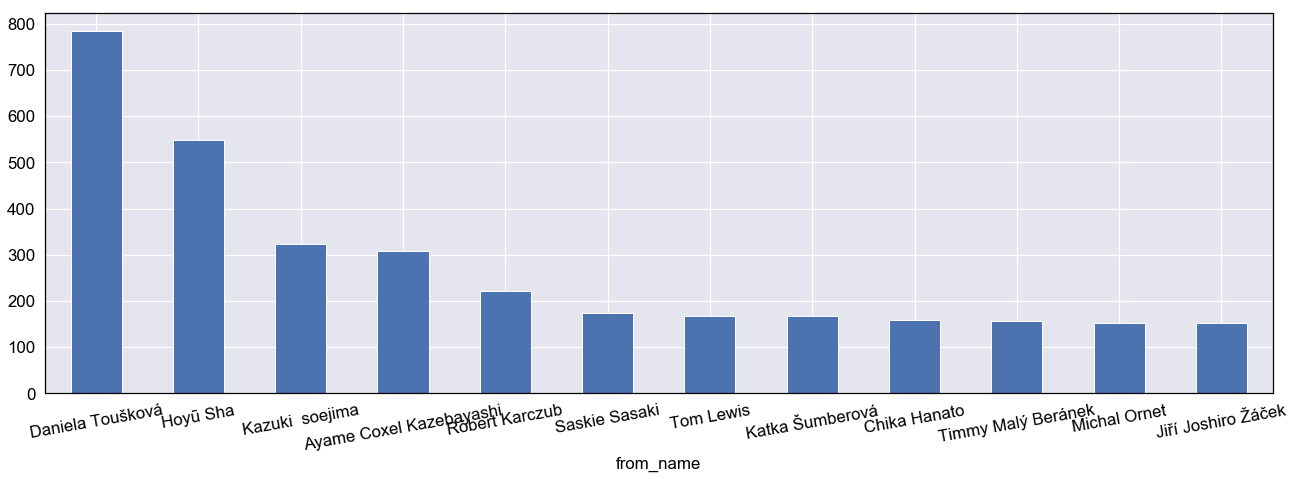

In [36]:
df_posts.groupby('from_name').mean().sort_values(by='word_count', ascending=False)[:12]['word_count'].plot.bar(figsize=(22, 7))
plt.xticks(rotation=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

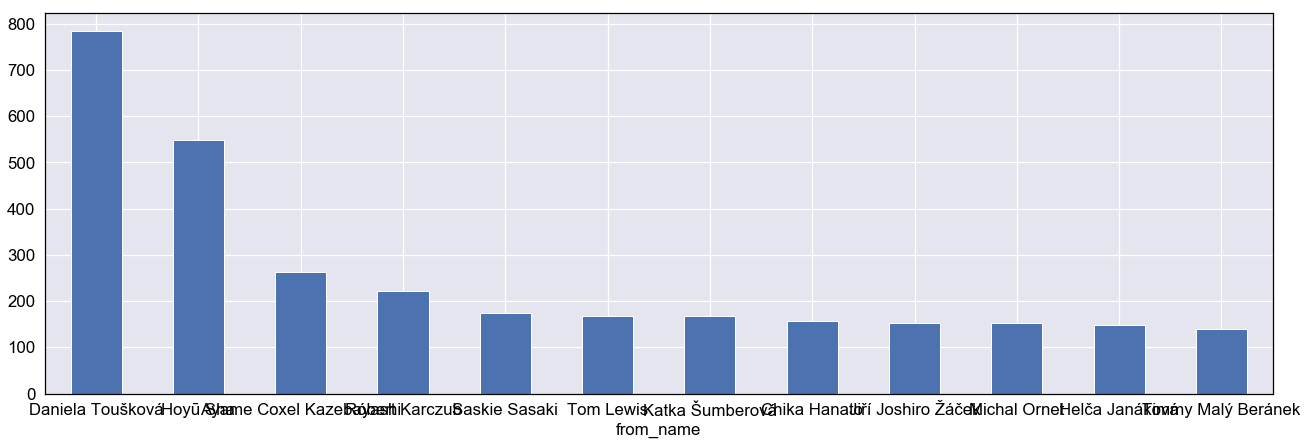

In [37]:
df_posts.groupby('from_name').median().sort_values(by='word_count', ascending=False)[:12]['word_count'].plot.bar(figsize=(22, 7))
plt.xticks(rotation=0)

In [38]:
df_posts.groupby('from_name').var().fillna(0).sort_values(by='word_count', ascending=False)[:12]

,shares_count,word_count,char_count
from_name,,,
Daniela Toušková,0.000000,1.226178e+06,1.531258e+07
Kazuki soejima,0.000000,3.263211e+05,1.227110e+07
Matěj Račinský,8.032258,1.274263e+05,5.000349e+06
Lukáš Aaron Tesař,0.000000,6.371396e+04,2.157286e+06
Tom Lewis,0.000000,4.774050e+04,1.491264e+06
Timmy Malý Beránek,0.666667,2.585187e+04,1.095680e+06
Miroslav Obelixovo Lochman,0.000000,2.580009e+04,9.137671e+05
Anna Hýsková,0.000000,2.571895e+04,8.359908e+05
Matej Šajgy Horatius,0.000000,2.489224e+04,1.121340e+06


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

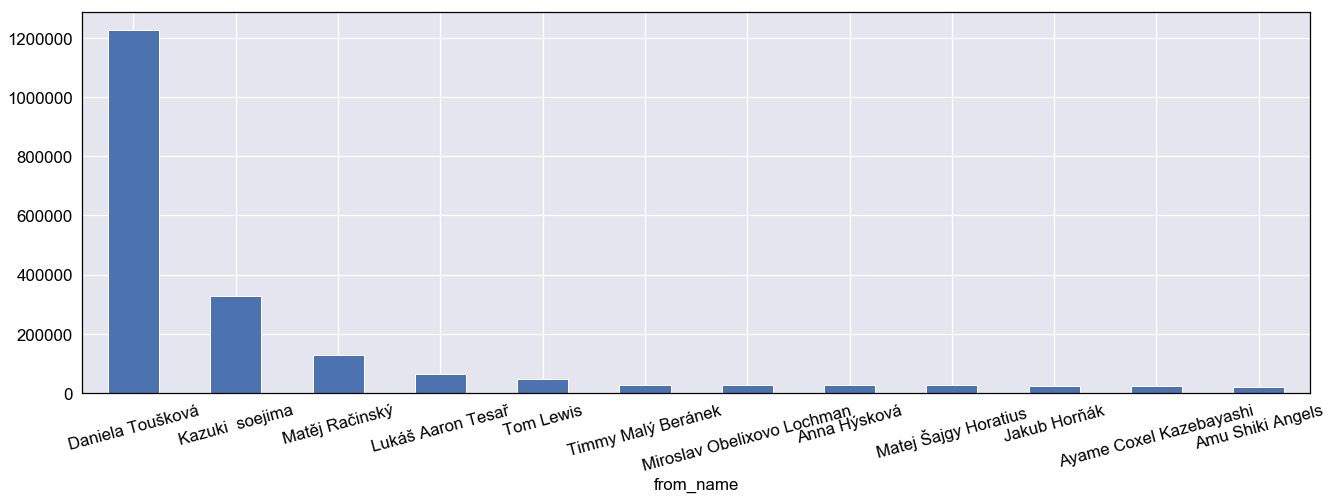

In [39]:
df_posts.groupby('from_name').var().sort_values(by='word_count', ascending=False)[:12]['word_count'].plot.bar(figsize=(22, 7))
plt.xticks(rotation=15)

## message lengths and types in time

In [40]:
df_posts['type'].value_counts()

status    15456
photo     15177
link       8947
video      6538
event       221
note          2
music         2
Name: type, dtype: int64

In [41]:
df_posts['type'].unique()

array(['status', 'link', 'photo', 'video', 'music', 'event', 'note'],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to 

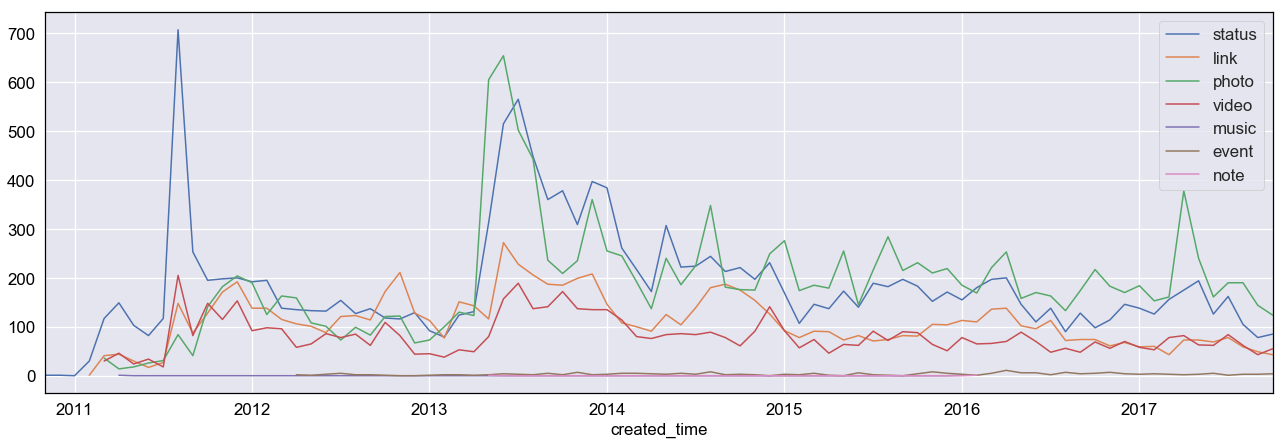

In [42]:
for post_type in df_posts['type'].unique():
    df_posts[df_posts['type'] == post_type].groupby(pd.Grouper(key='created_time', freq='M'))['type'].count().plot(figsize=(22, 7), label=post_type)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


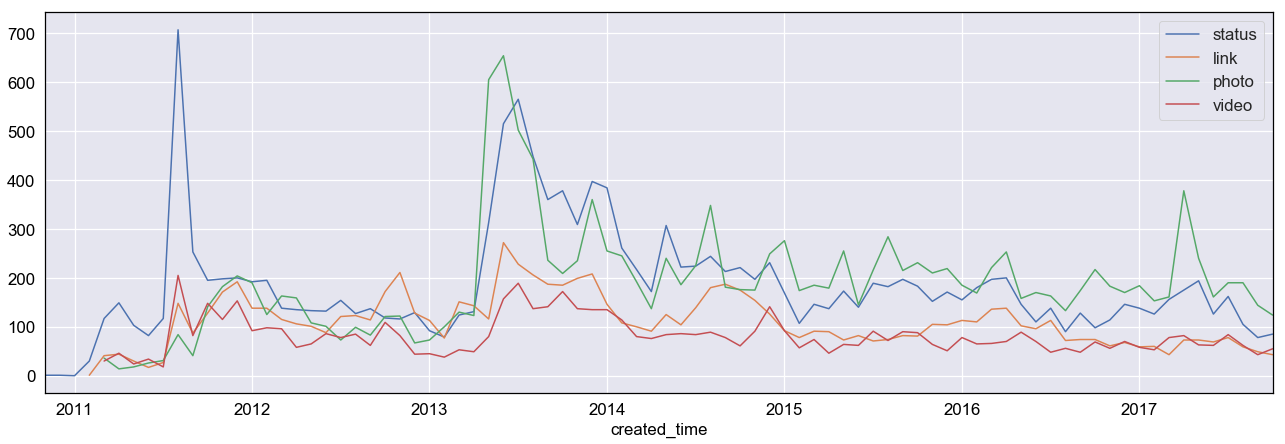

In [43]:
for post_type in ['status', 'link', 'photo', 'video']:
    df_posts[df_posts['type'] == post_type].groupby(pd.Grouper(key='created_time', freq='M'))['type'].count().plot(figsize=(22, 7), label=post_type)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


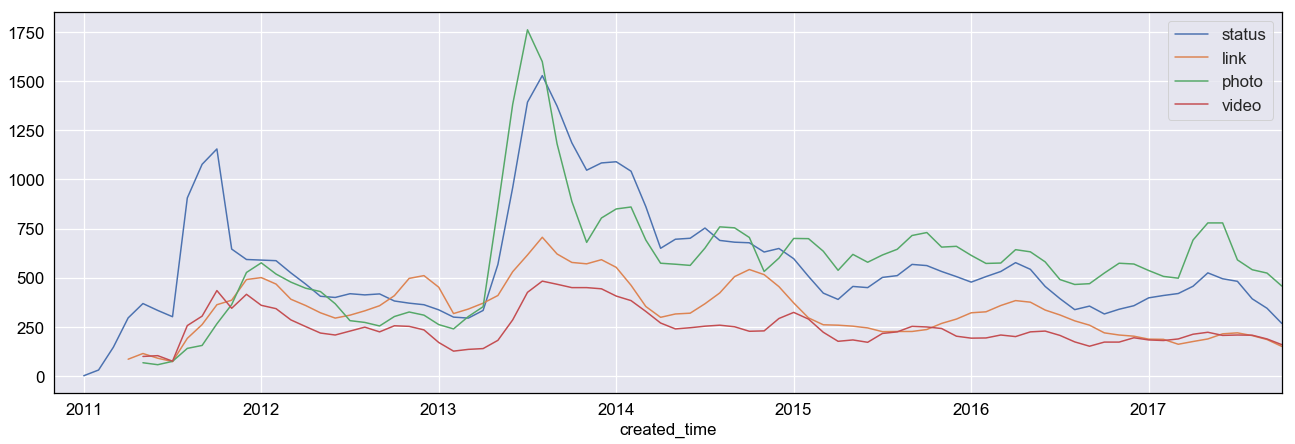

In [44]:
for post_type in ['status', 'link', 'photo', 'video']:
    df_posts[df_posts['type'] == post_type].groupby(pd.Grouper(key='created_time', freq='M'))['type'].count().rolling(3).sum().plot(figsize=(22, 7), label=post_type)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


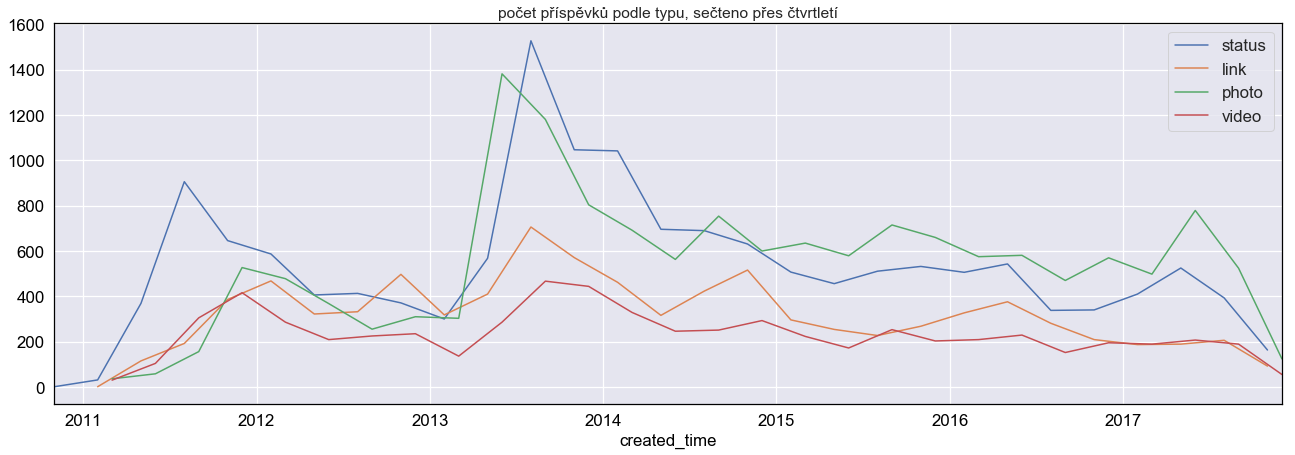

In [45]:
for post_type in ['status', 'link', 'photo', 'video']:
    df_posts[df_posts['type'] == post_type].groupby(pd.Grouper(key='created_time', freq='3M'))['type'].count().plot(figsize=(22, 7), label=post_type)
plt.title('počet příspěvků podle typu, sečteno přes čtvrtletí')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


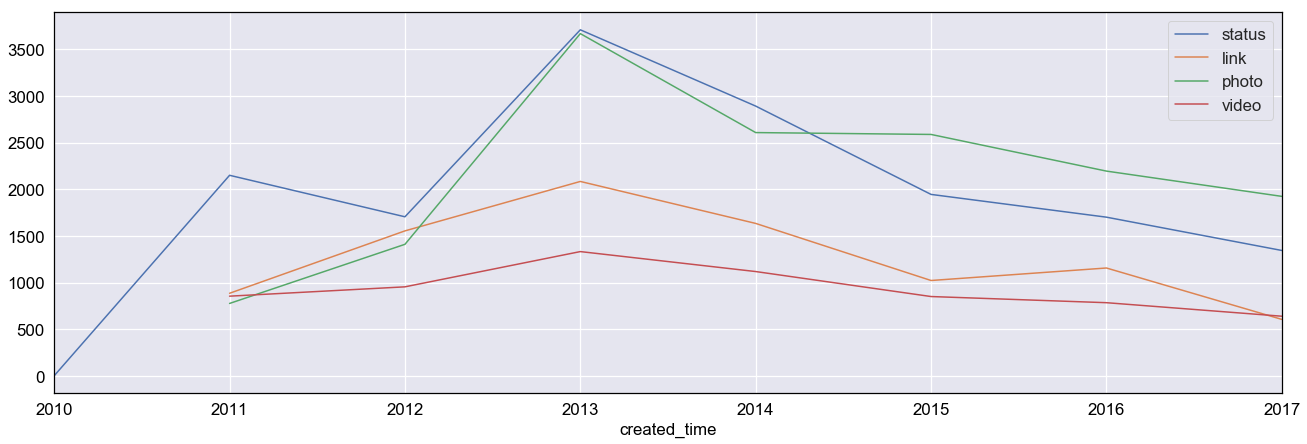

In [46]:
for post_type in ['status', 'link', 'photo', 'video']:
    df_posts[df_posts['type'] == post_type].groupby(pd.Grouper(key='created_time', freq='Y'))['type'].count().plot(figsize=(22, 7), label=post_type)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


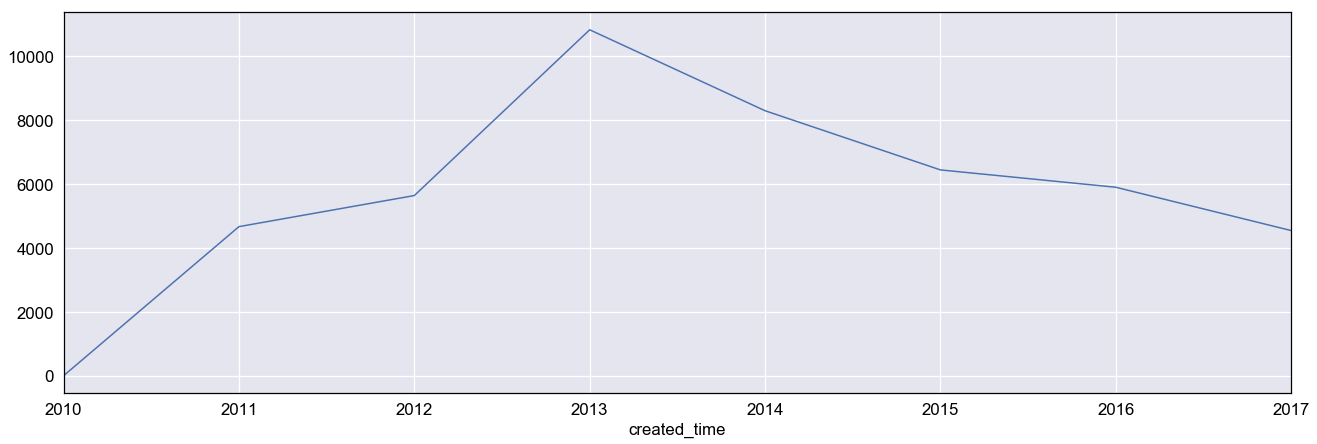

In [47]:
df_posts.groupby(pd.Grouper(key='created_time', freq='Y'))['message'].count().plot(figsize=(22, 7))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


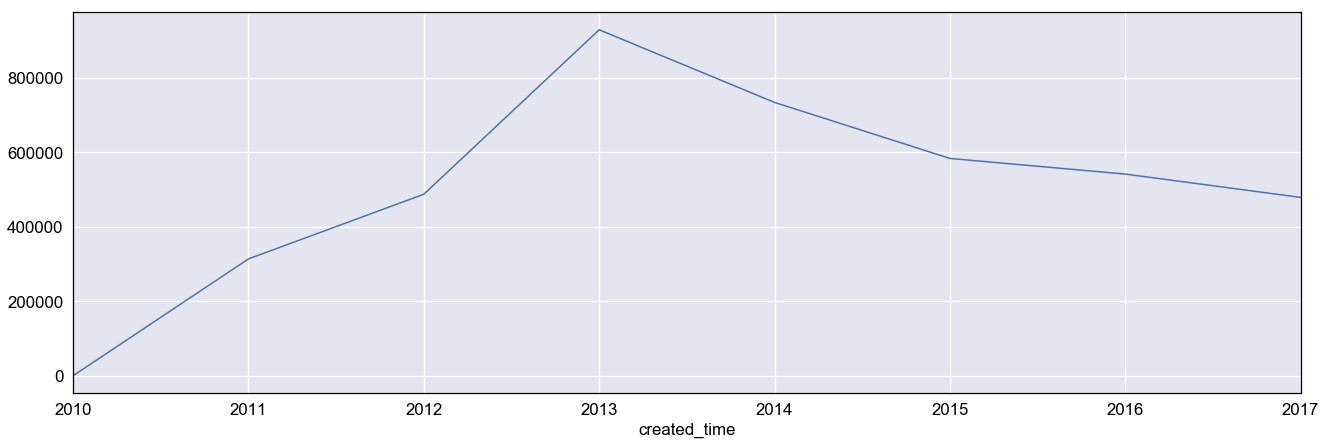

In [48]:
df_posts.groupby(pd.Grouper(key='created_time', freq='Y'))['char_count'].sum().plot(figsize=(22, 7))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


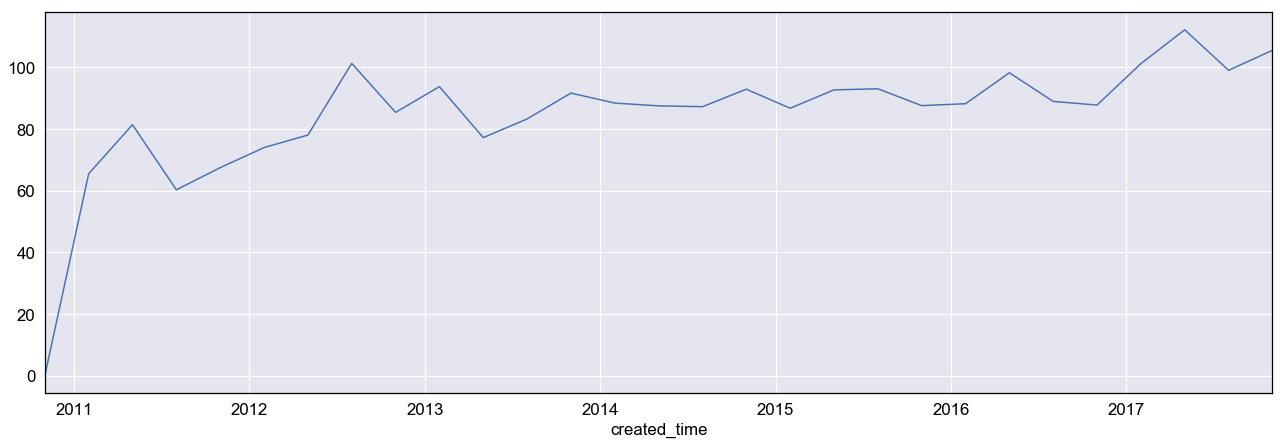

In [49]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['char_count'].mean().plot(figsize=(22, 7))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


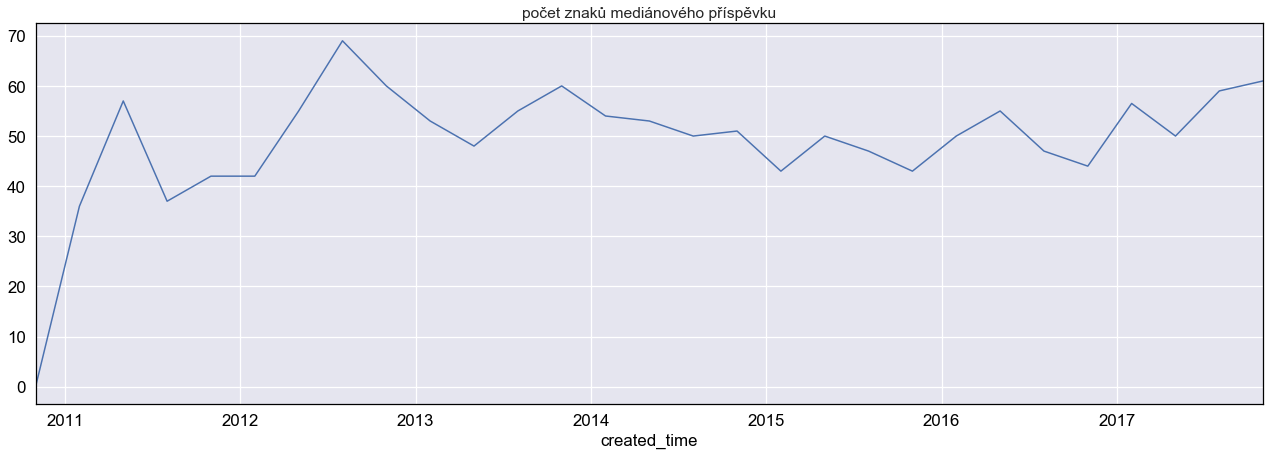

In [50]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['char_count'].median().plot(figsize=(22, 7), title='počet znaků mediánového příspěvku')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


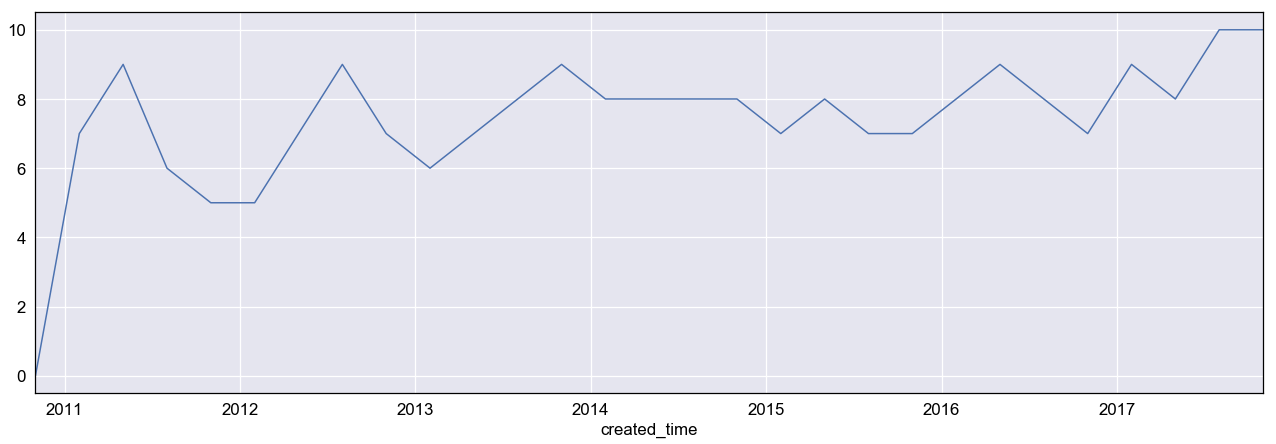

In [51]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['word_count'].median().plot(figsize=(22, 7))

In [52]:
df_posts[df_posts['type'] == 'video']

,attachment_title,attachment_type,attachment_url,created_time,from_id,from_name,message,object_id,shares_count,status_type,type,updated_time,word_count,char_count
id,,,,,,,,,,,,,,
135384786514720_164525353600663,"MEIKO ""The thought to tell"" - 物語風 Animated PV...",share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-30 22:06:00+00:00,1620842157937116,Karel Laštůvka,Vocaloid není jen Miku nebo Luka. Jsou tu i ji...,None,0,shared_story,video,2011-03-30 22:06:00+00:00,35,202
135384786514720_164456223607576,"[KAITO] ""To You"" english subbed",share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-30 15:48:41+00:00,1620842157937116,Karel Laštůvka,Komu se Kaitův hlas po poslechu téhle písničky...,None,0,shared_story,video,2011-03-30 21:02:18+00:00,10,60
135384786514720_164454933607705,Black Rock Shooter OVA Trailer,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-30 15:40:42+00:00,1662906653772475,Ico Azet,ak ste to nevideli...kde ste doteraz boli ?\n,None,0,shared_story,video,2011-03-30 19:36:02+00:00,8,44
135384786514720_164320436954488,【KAITO】When she found out I was a otaku ~Engli...,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-29 23:49:46+00:00,1620842157937116,Karel Laštůvka,,None,0,shared_story,video,2011-03-30 15:18:32+00:00,0,0
135384786514720_164000973653101,[BETA AMV]~Bleach-Death Breath ~(New Quality),share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-28 17:41:50+00:00,10208410673822724,Týnka Trungerová,tohle video žeru :D .. doufám že ho tu už někd...,None,0,shared_story,video,2011-03-28 19:17:13+00:00,13,56
135384786514720_163503817036150,Zettai Kareshi Japanese Drama Trailer,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-26 11:54:41+00:00,10210773799762505,Martin Nikl,nejzajímavější.. věc.. XD.. co sem v poslední ...,None,0,shared_story,video,2011-03-27 13:16:20+00:00,12,65
135384786514720_163603663692832,Welcome to the NHK AMV 1000 People,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-26 21:17:01+00:00,10210597076542816,Veroni Ubi Fodorová,♥♥♥,None,0,shared_story,video,2011-03-26 21:17:01+00:00,1,3
135384786514720_163562963696902,♥ Ulquiorra and Orihime ♥,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-26 17:41:06+00:00,10208410673822724,Týnka Trungerová,tenhle pár zbožňuju !! ♥ :D,None,0,shared_story,video,2011-03-26 19:31:25+00:00,6,27
135384786514720_163408773712321,THE YAOI POLKA,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,2011-03-25 22:53:11+00:00,10211137662817174,Eva Esarina Špinarová,Naprosto nejdokonalejší ... tohle mě vždycky d...,None,0,shared_story,video,2011-03-25 22:53:11+00:00,13,81


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


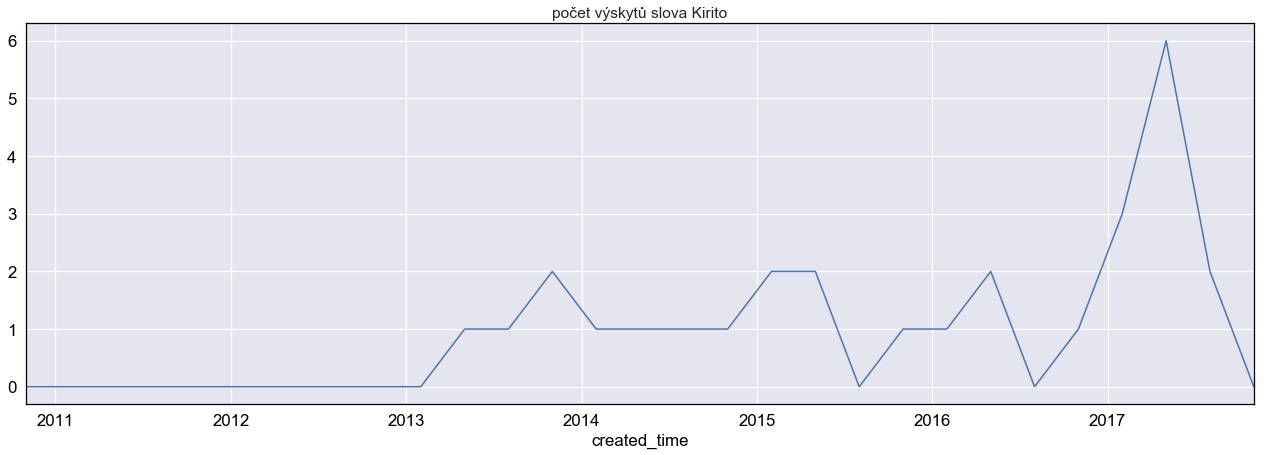

In [63]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('kirito', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova Kirito')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


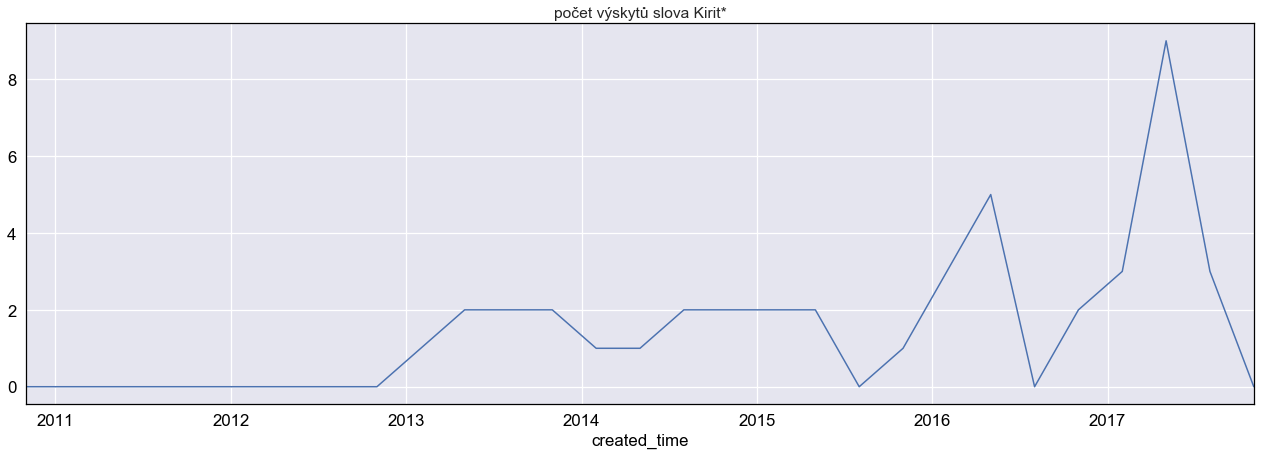

In [66]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('kirit', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova Kirit*')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


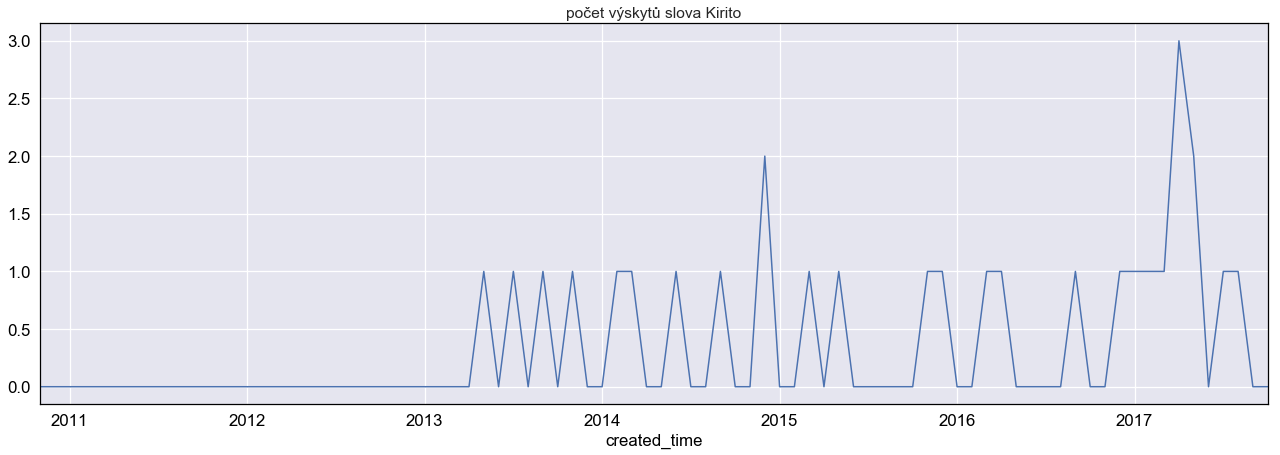

In [54]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('kirito', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova Kirito')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


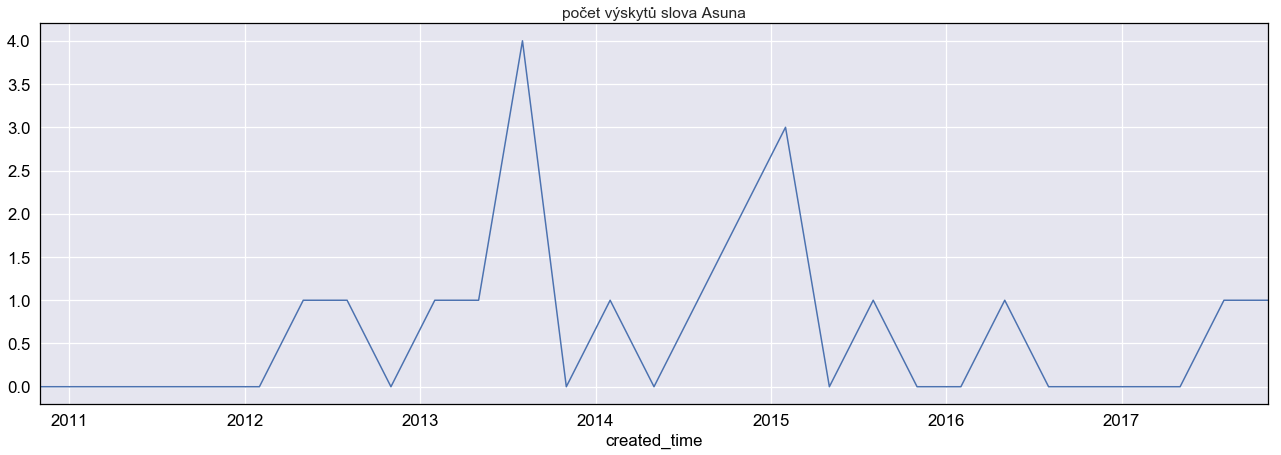

In [55]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('asuna', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova Asuna')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


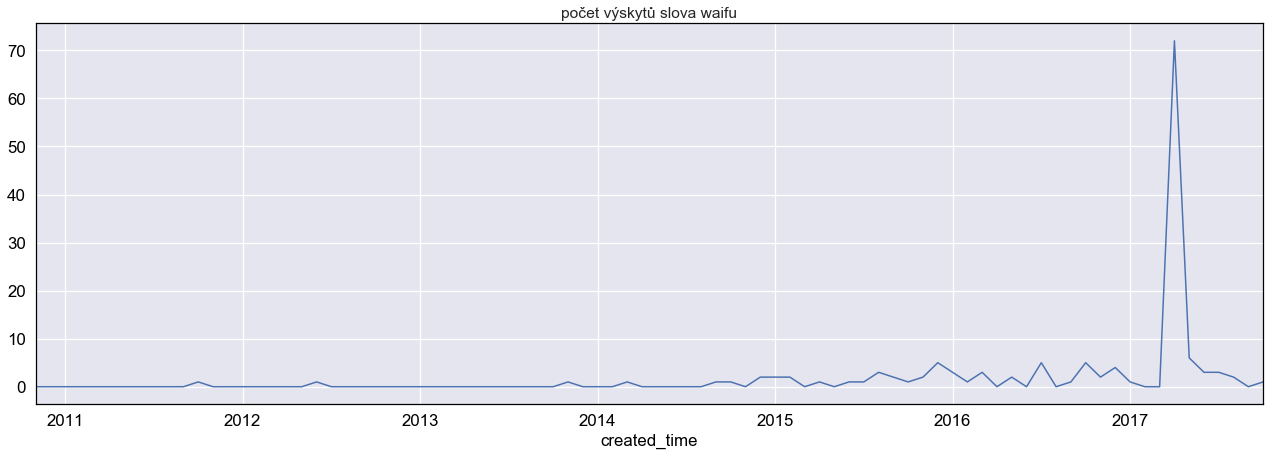

In [56]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('waifu', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova waifu')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


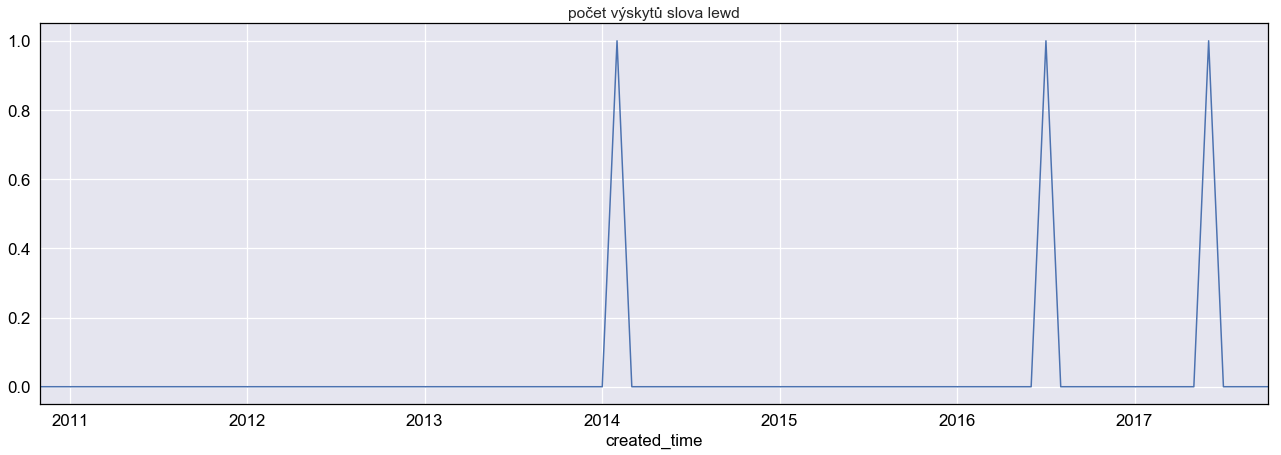

In [57]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('lewd', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova lewd')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


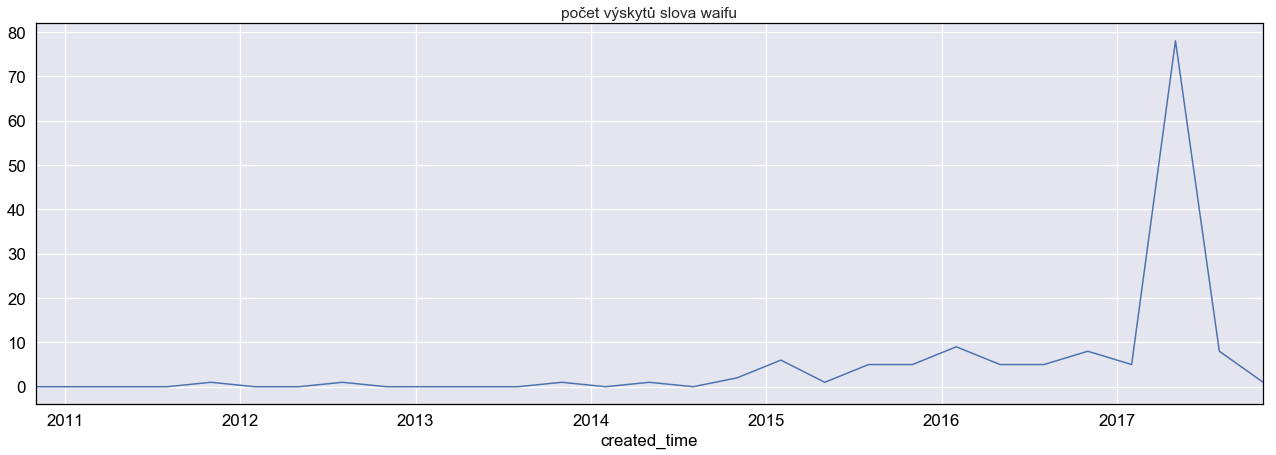

In [58]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('waifu', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova waifu')

In [59]:
df_posts[df_posts['message'].str.contains('waifu', case=False)][['from_name', 'message']]

,from_name,message
id,,
135384786514720_236288039757727,Robert Fiferna,http://cache.ohinternet.com/images/6/6f/OhWaif...
135384786514720_372320566154473,Robert Fiferna,So it has come to this. Now you can pretend to...
135384786514720_580774291975765,Bronislav Bažant,YOUR CIVILIZATION HAS ENTERED THE WAIFU ERA \n
135384786514720_635670889819438,Adam Furik,"Hide yo lolis, hide yo waifu ´cause Accelerato..."
135384786514720_727987393921120,Jitka Minna Nováková,Tohle by podle mě byla docela dobrá hymna pro ...
135384786514720_739266412793218,Zdeněk Pala,Protože všichni jedou po těhotných waifus.
135384786514720_777190989000760,Nikolas Ashien Németh,"Jak jsem čekal...přes noc se to tu ztratilo, p..."
135384786514720_776554975731028,Nikolas Ashien Németh,Všude tu je vidět samý wallpaper a doporučená ...
135384786514720_789480734438452,Martas Do,Zkuste mu sebrat waifu. :D


In [61]:
df_posts[df_posts['message'].str.contains('kirito', case=False)][['from_name', 'message', 'created_time']]

,from_name,message,created_time
id,,,
135384786514720_505590036160858,Daniela Čurová,"Odkedy vyšlo SAO, v hrách je nejak veľa postáv...",2013-05-21 21:01:26+00:00
135384786514720_532099486843246,Hepy Kitsune Fuwa,"je někde záznam z animefestu 2013 ""kirito 100...",2013-07-23 17:40:03+00:00
135384786514720_559935784059616,Michal Kunc,Překvápko Kirito... :D,2013-09-29 11:04:39+00:00
135384786514720_577509312302263,Teranas D. Svoboda,Líbil se Vám ten díl kdy Kirito přišel k Asuně...,2013-11-04 14:42:02+00:00
135384786514720_622687554451105,Adéla Chobotová,Fanoušci sao podržte se: Kirito má být v další...,2014-02-13 15:51:17+00:00
135384786514720_642197165833477,Tomáš Mezurashi Věrtelář,Zdravím hledáme +- 170cm vysokou Asunu(Sword A...,2014-03-31 19:31:48+00:00
135384786514720_681328158587044,Artur Weiner,Prvy realny kiritov mec zo sao a typek co ho v...,2014-06-18 10:11:31+00:00
135384786514720_728884957164697,Nguyễn Vũ Xuân Long,Jsem jedinej kdo byl dnešním SAOem celkem potě...,2014-09-27 21:19:39+00:00
135384786514720_764545343598658,Honza Sekanina,Čauky Otaci ^^ \nPo dlouhé době žádám o radu :...,2014-12-08 16:31:25+00:00


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


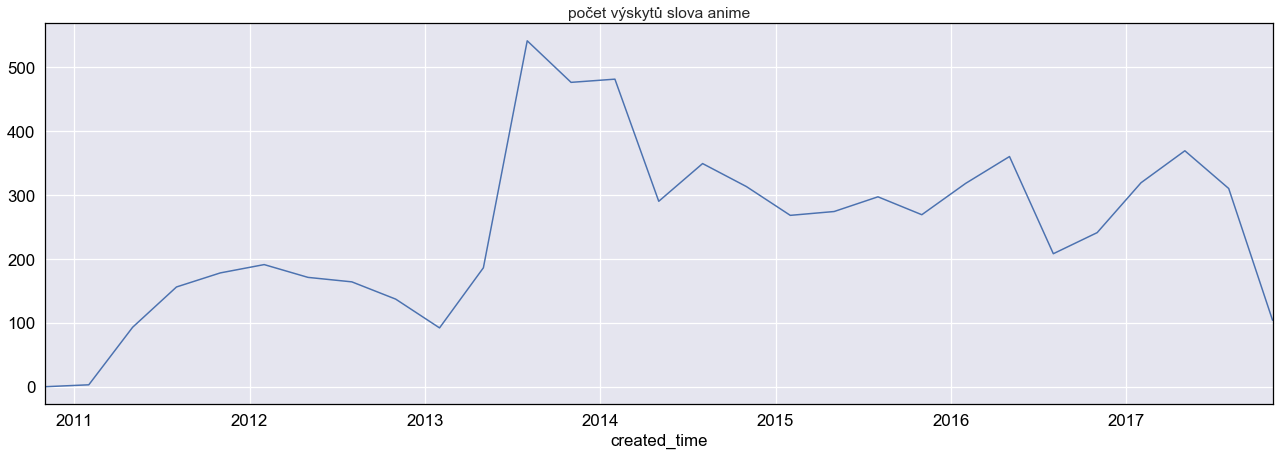

In [67]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('anime', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova anime')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


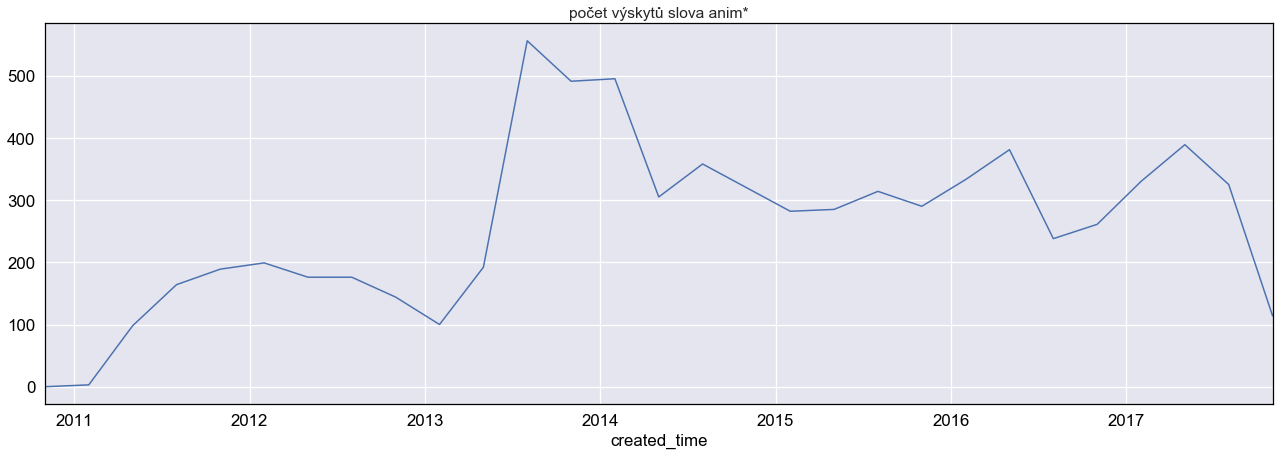

In [68]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('anim', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova anim*')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


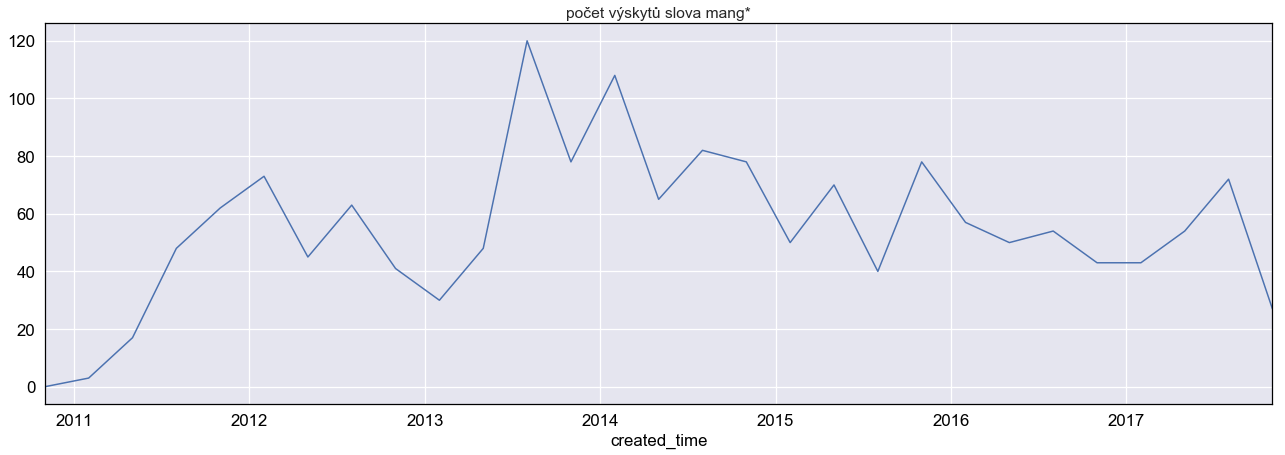

In [69]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('mang', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova mang*')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


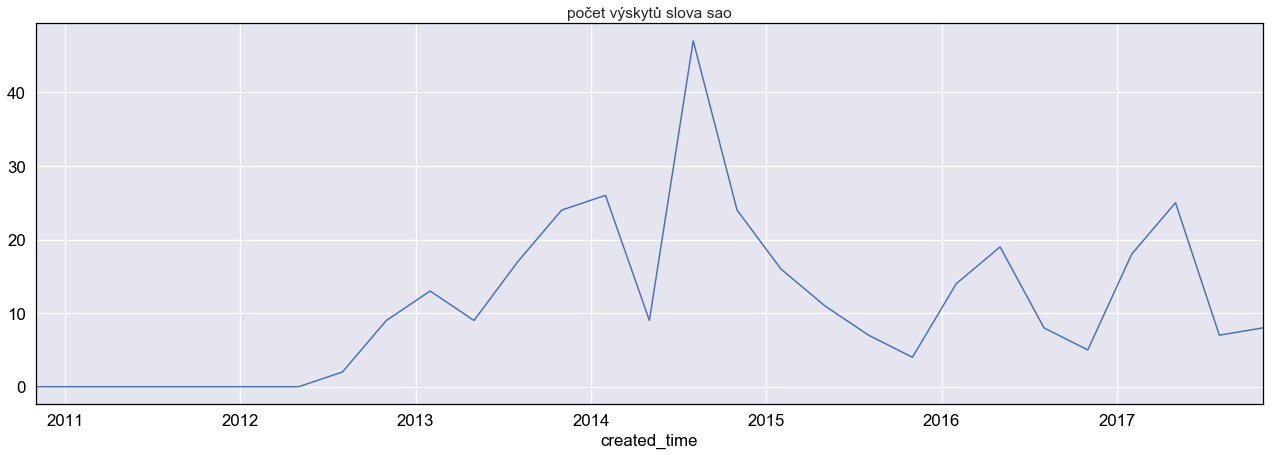

In [70]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('sao', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova sao')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


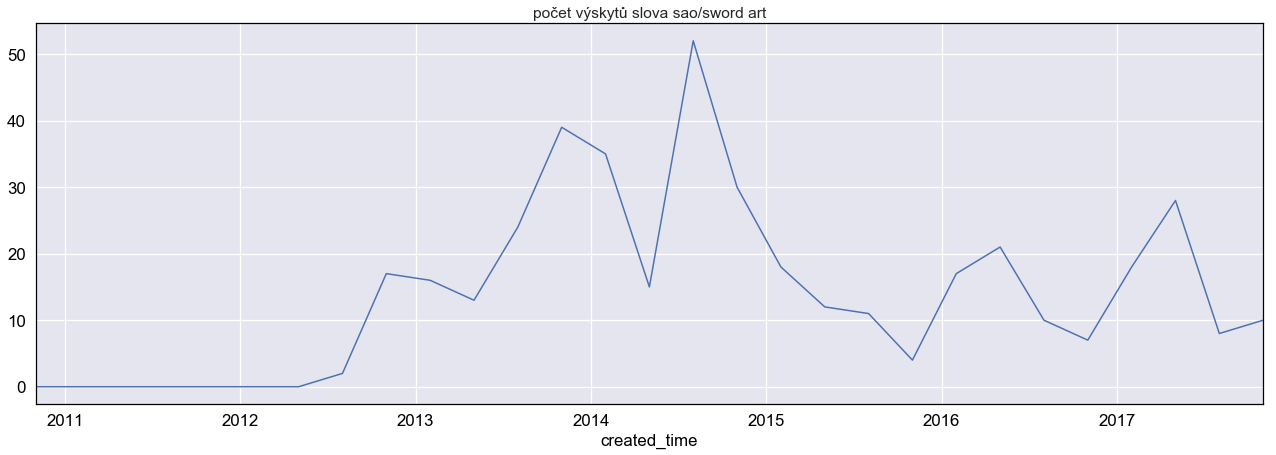

In [73]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('sao|sword art', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova sao/sword art')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


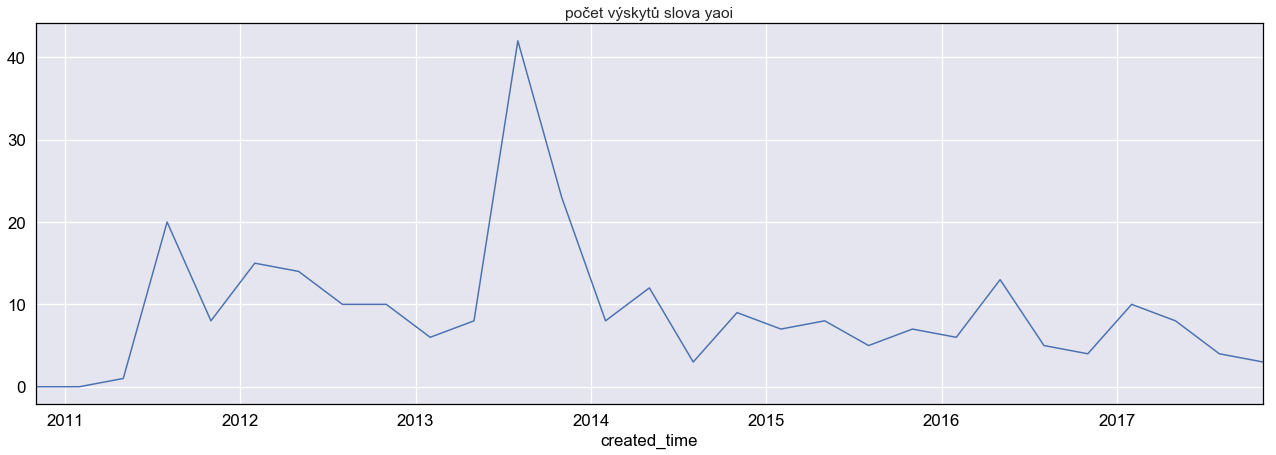

In [77]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('yaoi', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova yaoi')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


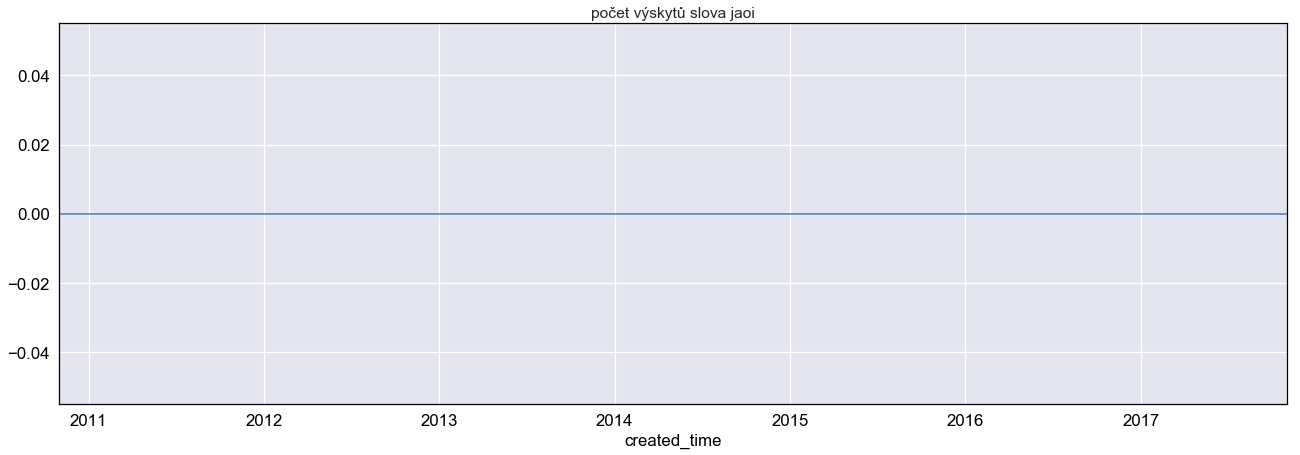

In [76]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('jaoi', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova jaoi')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


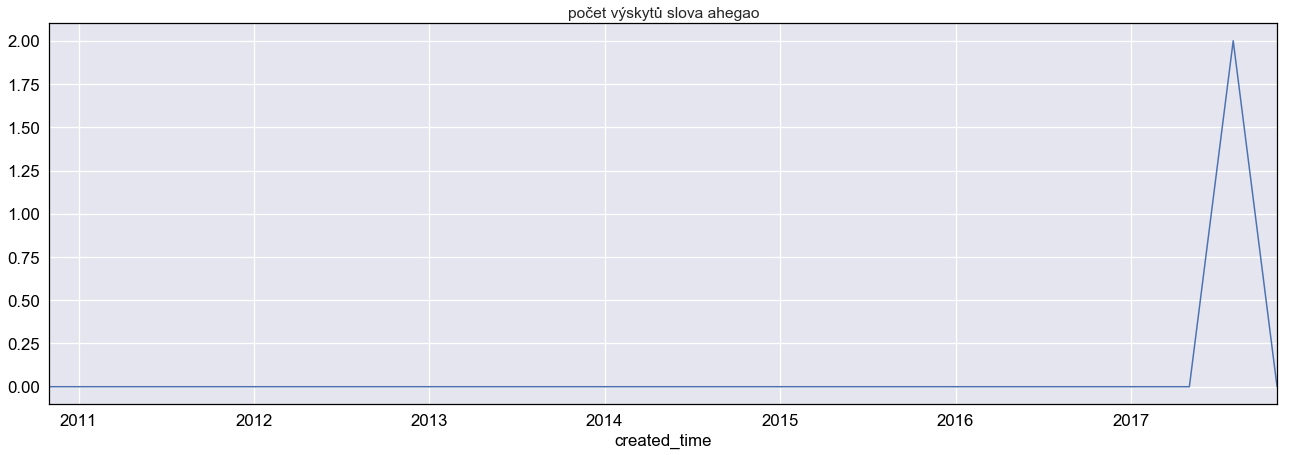

In [75]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('ahegao', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova ahegao')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


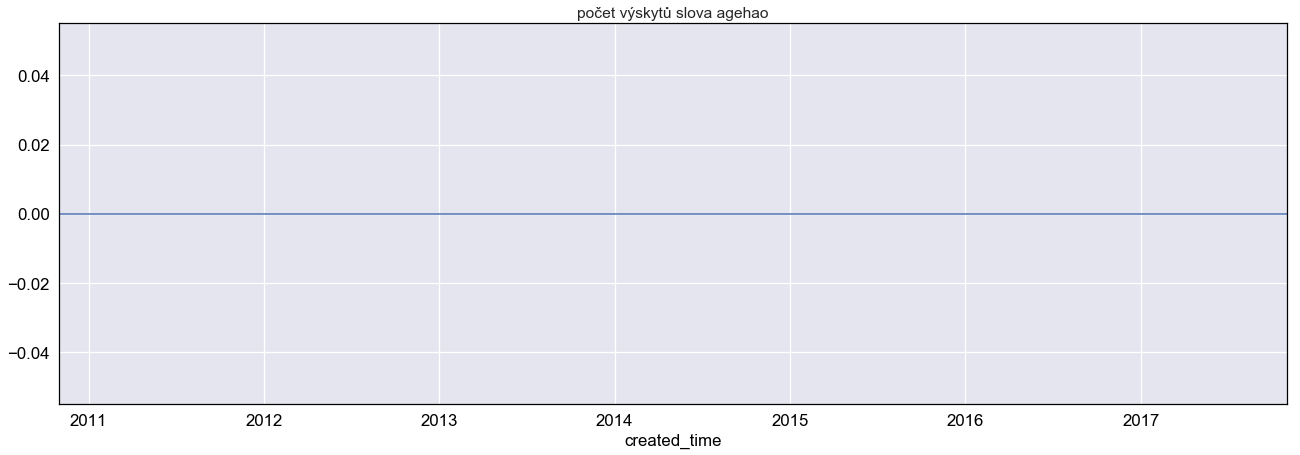

In [78]:
df_posts.groupby(pd.Grouper(key='created_time', freq='3M'))['message'].agg(lambda x: x.str.contains('agehao', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova agehao')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


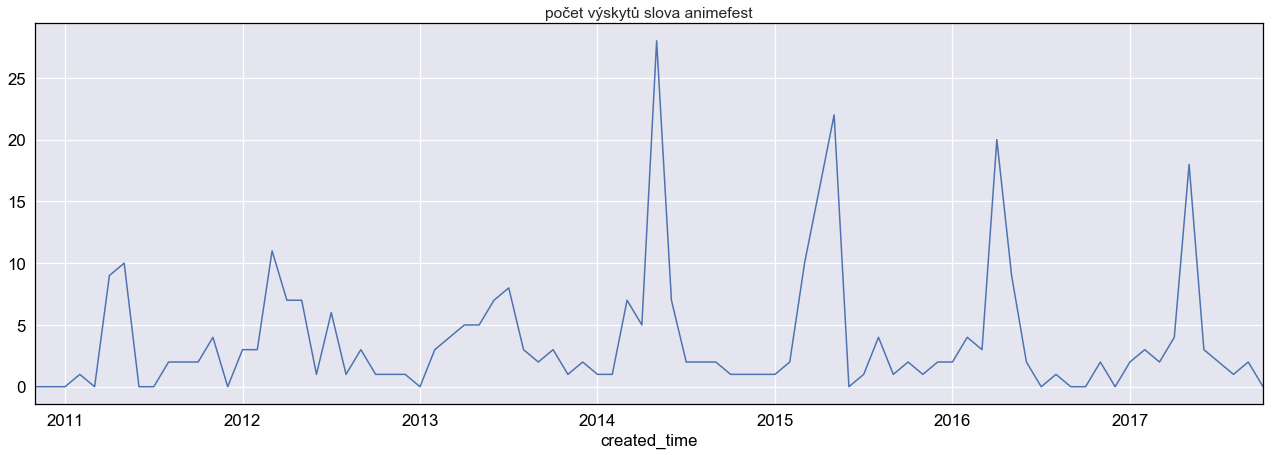

In [80]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('animefest', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova animefest')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


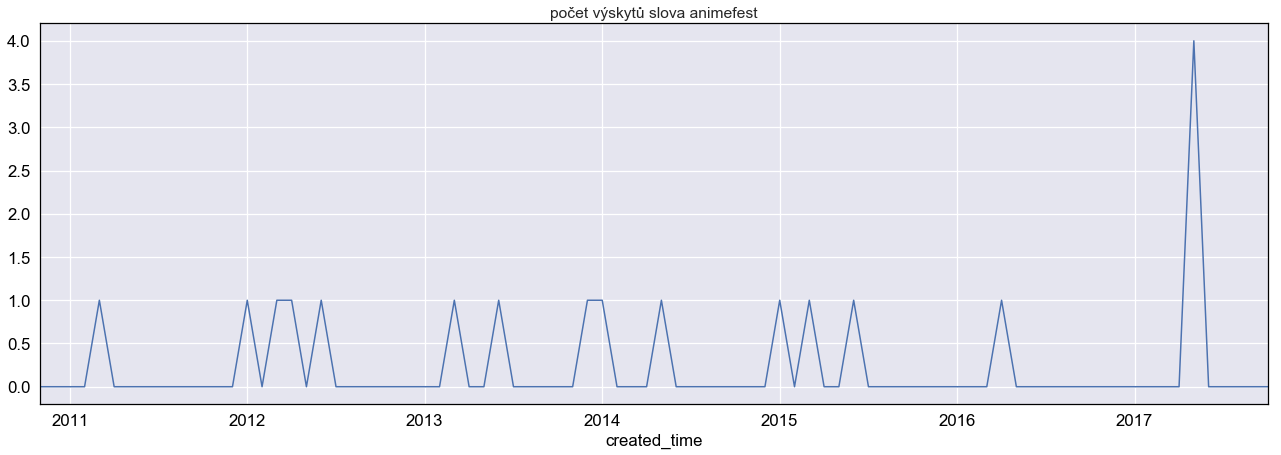

In [81]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('anime fest', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova animefest')

([<matplotlib.axis.XTick at 0x1da303f6eb8>,
 <a list of 12 Text xticklabel objects>)

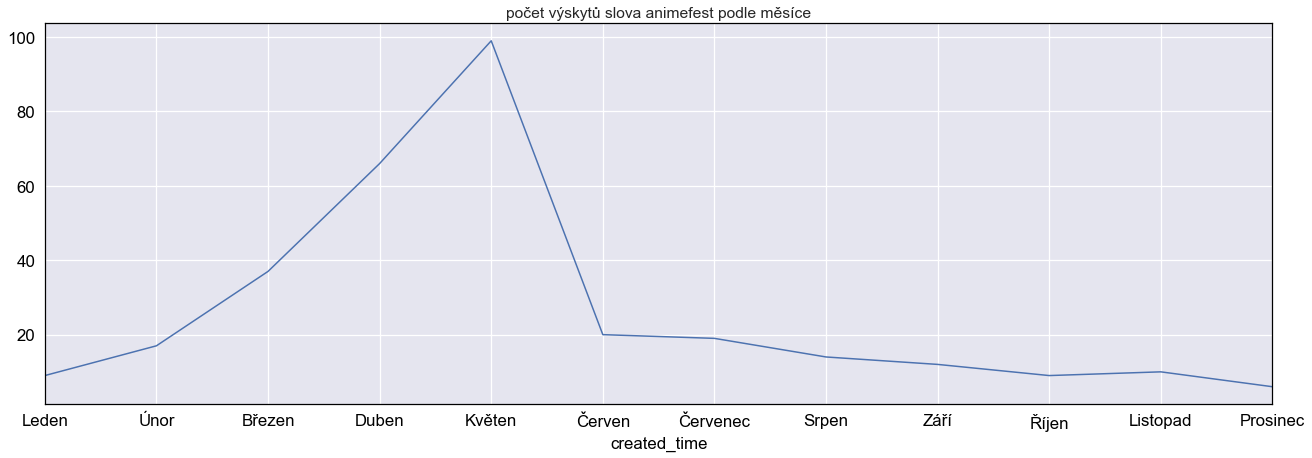

In [92]:
df_posts.groupby(df_posts['created_time'].dt.month)['message'].agg(lambda x: x.str.contains('animefest', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova animefest podle měsíce')
plt.xticks(np.arange(1, 13), ['Leden', 'Únor', 'Březen', 'Duben', 'Květen', 'Červen', 'Červenec', 'Srpen', 'Září', 'Říjen', 'Listopad', 'Prosinec'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


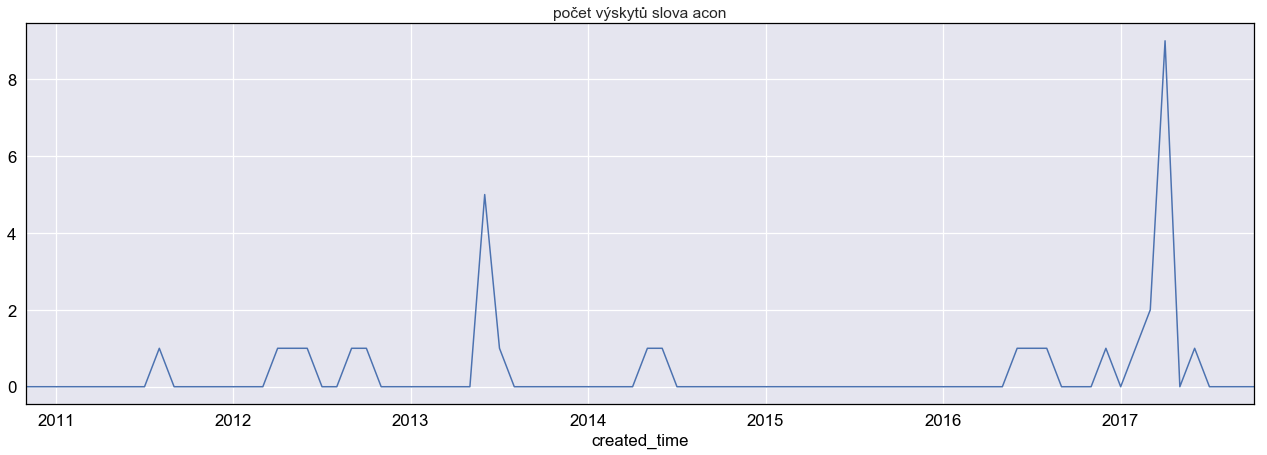

In [93]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('acon', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova acon')

In [95]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('animefest', case=False).sum()).values

array([ 0,  0,  0,  1,  0,  9, 10,  0,  0,  2,  2,  2,  4,  0,  3,  3, 11,
        7,  7,  1,  6,  1,  3,  1,  1,  1,  0,  3,  4,  5,  5,  7,  8,  3,
        2,  3,  1,  2,  1,  1,  7,  5, 28,  7,  2,  2,  2,  1,  1,  1,  1,
        2, 10, 16, 22,  0,  1,  4,  1,  2,  1,  2,  2,  4,  3, 20,  9,  2,
        0,  1,  0,  0,  2,  0,  2,  3,  2,  4, 18,  3,  2,  1,  2,  0],
      dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


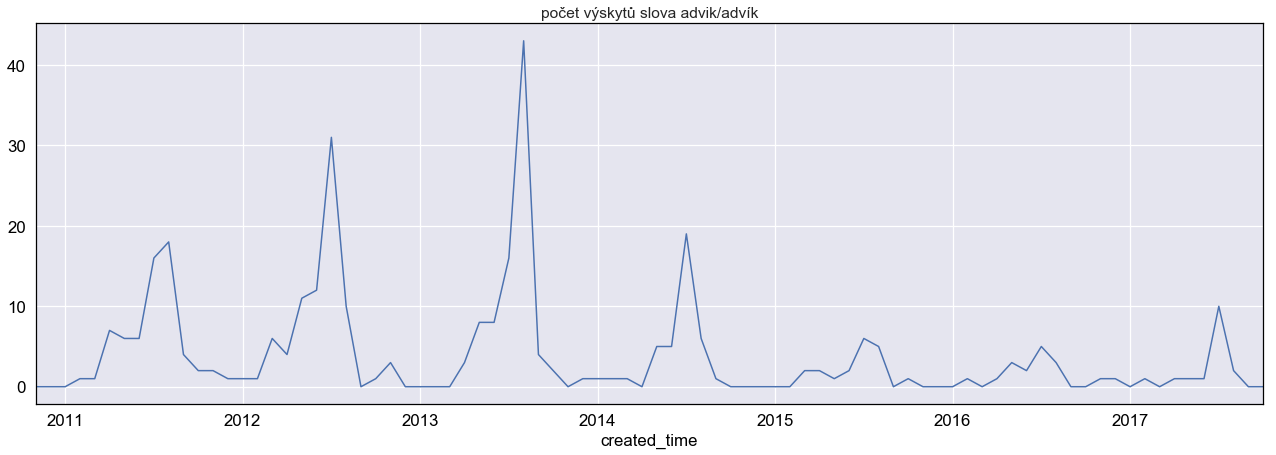

In [100]:
df_posts.groupby(pd.Grouper(key='created_time', freq='M'))['message'].agg(lambda x: x.str.contains('advik|advík', case=False).sum()).plot(figsize=(22, 7), title='počet výskytů slova advik/advík')